In [1]:
import torch

from test_importance import build_dataloader_and_model, inference

/data/yangming/.conda/envs/noise/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
def get_importances(dataset_name: str, model_name: str):
    device = torch.device("cuda")

    dataloader, model = build_dataloader_and_model(
        dataset_name=dataset_name,
        batch_size=64,
        num_workers=4,
        model_name=model_name,
        dataset_root="../data"
    )
    model.eval()
    model.to(device)
    model.register_importance_hooks()

    inference(dataloader, model, device)

    return model.get_importances()

In [8]:
cifar10_vgg16_importances = get_importances("cifar10", "vgg16")

Files already downloaded and verified


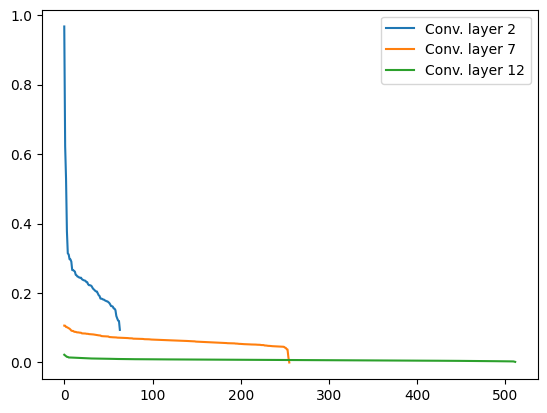

In [22]:
from matplotlib import pyplot as plt


def draw_importances(importances):
    for layer_idx in [2, 7, 12]:
        layer_scores = importances[layer_idx - 1]
        layer_scores = layer_scores.cpu().sort(descending=True)[0].numpy()
        plt.plot(range(layer_scores.shape[0]), layer_scores, label=f"Conv. layer {layer_idx}")
    plt.legend(loc="upper right")
    plt.show()


draw_importances(cifar10_vgg16_importances)

In [1]:
import numpy as np


def draw_importances(importances):
    for layer_idx in [2, 7, 12]:
        layer_scores = importances[layer_idx - 1]
        layer_scores = layer_scores.cpu().sort(descending=True)[0].numpy()

        plt.plot(
            np.linspace(0, 1, num=layer_scores.shape[0]), layer_scores,
            label=f"Conv. layer {layer_idx}",
        )
    plt.legend(loc="upper right")
    plt.show()


draw_importances(cifar10_vgg16_importances)

NameError: name 'cifar10_vgg16_importances' is not defined